In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
Lat_lng = list(coordinates)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=69a5742ec3852cc037ea2b80733d1d63


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | kulu
Processing Record 5 of Set 1 | pervomayskoye
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | osoyoos
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sorong
Processing Record 11 of Set 1 | balkanabat
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | nordby
Processing Record 14 of Set 1 | narasannapeta
Processing Record 15 of Set 1 | ocos
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | pak phanang
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | bargal
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | illoqqortoormiut
Ci

Processing Record 39 of Set 4 | hervey bay
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | broken hill
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | turbat
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | san isidro
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | martapura
Processing Record 49 of Set 4 | ahuimanu
Processing Record 50 of Set 4 | karaul
City not found. Skipping...
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | zhenhai
Processing Record 3 of Set 5 | poshekhonye
Processing Record 4 of Set 5 | young
Processing Record 5 of Set 5 | margate
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | comodoro rivadavia
Processing Record 8 of Set 5 | dakar
Processing Record 9 of Set 5 | turayf
Processing Record 10 of Set 5 | snasa
Processing Record 11 of Set 5 | los llanos de aridane
Processing Record 12 

Processing Record 28 of Set 8 | saryg-sep
Processing Record 29 of Set 8 | samusu
City not found. Skipping...
Processing Record 30 of Set 8 | kaitangata
Processing Record 31 of Set 8 | robinson
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | nuzvid
Processing Record 34 of Set 8 | nuuk
Processing Record 35 of Set 8 | vostok
Processing Record 36 of Set 8 | parkes
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | aljezur
Processing Record 39 of Set 8 | ruteng
Processing Record 40 of Set 8 | nagod
Processing Record 41 of Set 8 | kautokeino
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | talkha
Processing Record 44 of Set 8 | sitka
Processing Record 45 of Set 8 | ca mau
Processing Record 46 of Set 8 | verkhnevilyuysk
Processing Record 47 of Set 8 | lodja
Processing Record 48 of Set 8 | sakaraha
Processing Record 49 of Set 8 | plettenberg bay
Processing Record 50 of Set 8 | tura
Processing Record 1 of Set 9 | osimo
Proces

Processing Record 17 of Set 12 | channel-port aux basques
Processing Record 18 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 12 | huilong
Processing Record 20 of Set 12 | fershampenuaz
Processing Record 21 of Set 12 | maykain
City not found. Skipping...
Processing Record 22 of Set 12 | redmond
Processing Record 23 of Set 12 | birin
Processing Record 24 of Set 12 | southbridge
Processing Record 25 of Set 12 | cabalitian
Processing Record 26 of Set 12 | kushima
Processing Record 27 of Set 12 | salalah
Processing Record 28 of Set 12 | paamiut
Processing Record 29 of Set 12 | sobolevo
Processing Record 30 of Set 12 | ratnagiri
Processing Record 31 of Set 12 | babu
Processing Record 32 of Set 12 | mangrol
Processing Record 33 of Set 12 | tabou
Processing Record 34 of Set 12 | ust-barguzin
Processing Record 35 of Set 12 | kincardine
Processing Record 36 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 12 | barrhead
Processing 

In [11]:
len(city_data)

598

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-0.45,65,7,16.60,RU,2022-02-04 15:18:50
1,Port Alfred,-33.5906,26.8910,69.42,75,100,10.47,ZA,2022-02-04 15:18:50
2,Saint George,37.1041,-113.5841,33.35,51,0,4.00,US,2022-02-04 15:15:21
3,Kulu,39.0951,33.0799,27.05,78,16,12.17,TR,2022-02-04 15:18:51
4,Pervomayskoye,43.9190,46.7102,43.83,77,100,6.42,RU,2022-02-04 15:18:51
5,Saint-Philippe,-21.3585,55.7679,81.95,87,100,27.98,RE,2022-02-04 15:18:52
6,Punta Arenas,-53.1500,-70.9167,51.91,43,0,10.36,CL,2022-02-04 15:18:19
7,Osoyoos,49.0331,-119.4524,30.34,80,100,8.05,CA,2022-02-04 15:15:21
8,Rikitea,-23.1203,-134.9692,77.77,73,100,12.08,PF,2022-02-04 15:17:43
9,Sorong,-0.8833,131.2500,81.27,81,100,10.87,ID,2022-02-04 15:18:52


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-02-04 15:18:50,64.3833,-173.3000,-0.45,65,7,16.60
1,Port Alfred,ZA,2022-02-04 15:18:50,-33.5906,26.8910,69.42,75,100,10.47
2,Saint George,US,2022-02-04 15:15:21,37.1041,-113.5841,33.35,51,0,4.00
3,Kulu,TR,2022-02-04 15:18:51,39.0951,33.0799,27.05,78,16,12.17
4,Pervomayskoye,RU,2022-02-04 15:18:51,43.9190,46.7102,43.83,77,100,6.42
...,...,...,...,...,...,...,...,...,...
593,Dunedin,NZ,2022-02-04 15:30:14,-45.8742,170.5036,52.81,78,100,5.99
594,Alice Springs,AU,2022-02-04 15:30:23,-23.7000,133.8833,62.15,72,3,1.14
595,Mpika,ZM,2022-02-04 15:33:49,-11.8343,31.4529,60.24,98,100,12.35
596,Lahaina,US,2022-02-04 15:33:49,20.8783,-156.6825,67.80,79,0,2.17


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

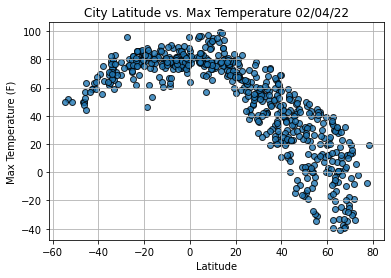

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

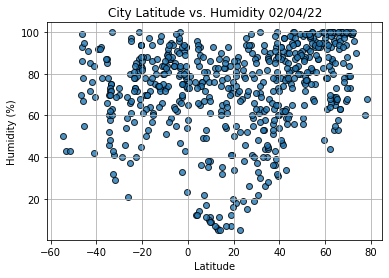

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

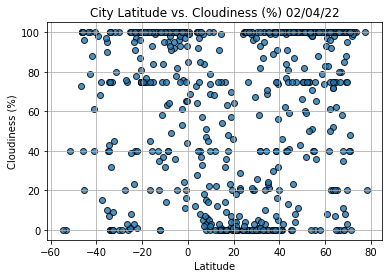

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

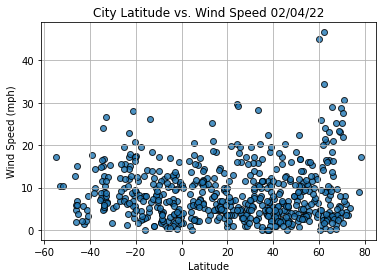

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

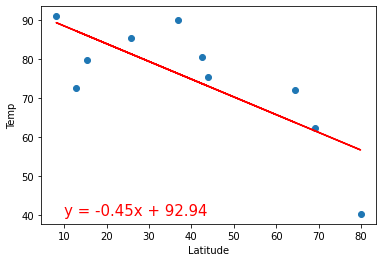

In [24]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                Narasannapeta
Country                        IN
Date          2022-02-04 15:18:53
Lat                       18.4167
Lng                         84.05
Max Temp                    73.42
Humidity                       84
Cloudiness                      1
Wind Speed                   9.46
Name: 13, dtype: object

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-02-04 15:18:50,64.3833,-173.3000,-0.45,65,7,16.60
2,Saint George,US,2022-02-04 15:15:21,37.1041,-113.5841,33.35,51,0,4.00
3,Kulu,TR,2022-02-04 15:18:51,39.0951,33.0799,27.05,78,16,12.17
4,Pervomayskoye,RU,2022-02-04 15:18:51,43.9190,46.7102,43.83,77,100,6.42
7,Osoyoos,CA,2022-02-04 15:15:21,49.0331,-119.4524,30.34,80,100,8.05


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

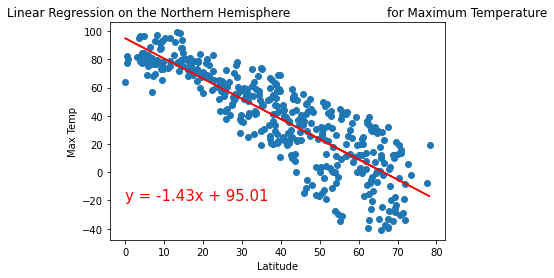

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

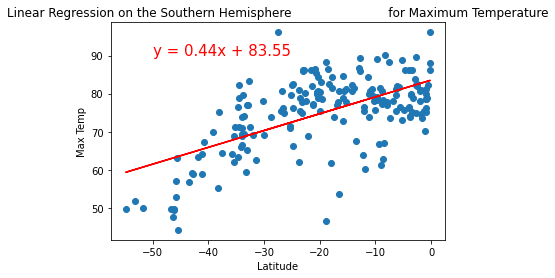

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

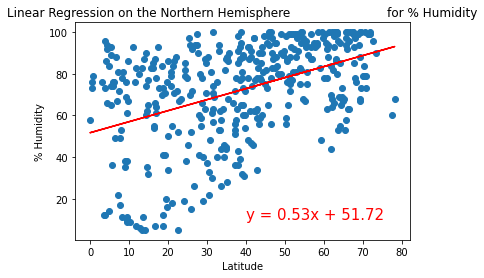

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

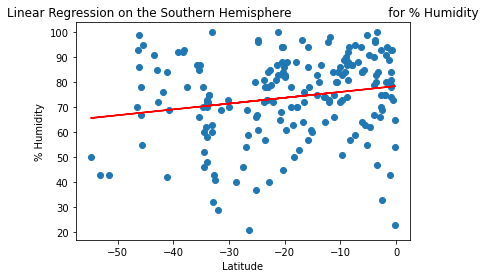

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

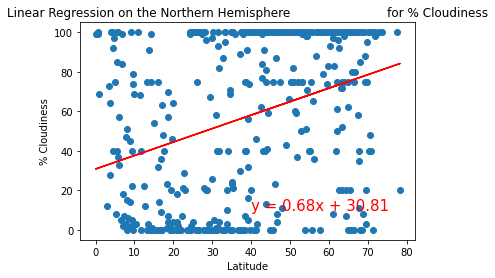

In [56]:
# Skill Drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

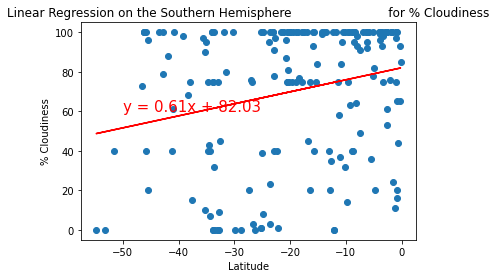

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

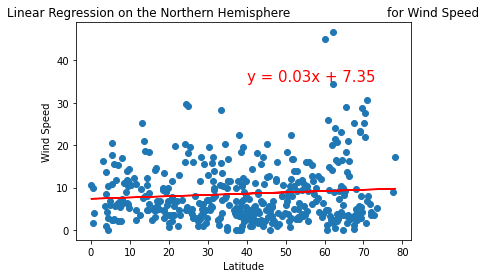

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

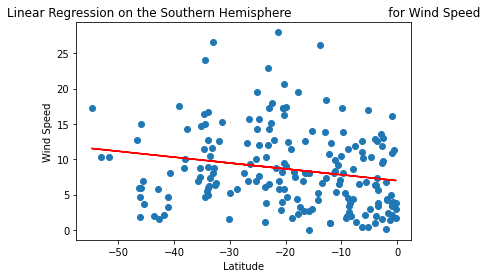

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))